## Imports

In [1]:
import pandas as pd
from math import sqrt, ceil
import os

## Read Files

In [226]:
# Read all features files and concat them
datasets_dir = 'C:/Users/sherw/OneDrive - Singapore Polytechnic/DISM 2021 S1/ITSP (FYP)/Jupyter/IOT/Datasets/'
df_list = []
os.listdir(datasets_dir)
for file in os.listdir(datasets_dir):
    df_buffer = pd.read_csv(datasets_dir + file)
    df_list.append(df_buffer)
    print(file + ' Loaded')
df = pd.concat(df_list, axis=0, ignore_index=True) # Concat row-wise
    
# Read Label File    
label_df = pd.read_csv('labels.csv')
print('labels.csv Loaded')
print('\nDone')

part0.csv Loaded
part1.csv Loaded
part2.csv Loaded
part3.csv Loaded
part4.csv Loaded
part5.csv Loaded
part6.csv Loaded
part7.csv Loaded
part8.csv Loaded
part9.csv Loaded
labels.csv Loaded

Done


#### Sort DataFrames

In [227]:
df = df.sort_values(by=['bookingID', 'second'], ascending=[True, True])
label_df = label_df.sort_values(by='bookingID', ascending=True)

In [228]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
10835302,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
12007854,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
3394723,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
436147,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
9490986,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [229]:
label_df.head()

,bookingID,label
15035,0,0
13312,1,1
996,2,1
2328,4,1
5192,6,0


## Data Cleaning

### Removing duplicates and conflicts

In [230]:
duplicate_ids = list(label_df[label_df['bookingID'].duplicated() == True]['bookingID'])

In [231]:
len(duplicate_ids)

18

There are duplicate IDs within the labels, therefore they should be removed

In [232]:
label_df[label_df['bookingID'].duplicated() == True].sort_values('bookingID')

,bookingID,label
12463,13,0
2351,154618822837,1
6212,223338299461,0
6121,395136991308,1
17623,403726925929,1
2858,455266533495,1
18027,481036337234,0
16462,515396075694,0
17001,695784702084,1
18951,919123001348,0


In [233]:
df.shape

(16135561, 11)

In [234]:
label_df.shape

(20018, 2)

In [235]:
df = df[~df['bookingID'].isin(duplicate_ids)]
label_df = label_df[~label_df['bookingID'].isin(duplicate_ids)]

In [236]:
df.shape

(16116704, 11)

In [237]:
label_df.shape

(19982, 2)

### Dropping inaccurate data

In [238]:
df.shape

(16116704, 11)

In [239]:
df = df[df['Accuracy'] <= 10]

In [240]:
df.shape

(14088943, 11)

### Accounting complete loss of trip data from cleaning

In [241]:
remaining_ids = list(df['bookingID'])
label_df = label_df[label_df['bookingID'].isin(remaining_ids)]

In [242]:
label_df.shape

(19827, 2)

Further data cleaning to be done after feature engineering

## Feature Engineering

In [243]:
df.head(10)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
12007854,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
3394723,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
436147,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
9490986,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454
14879334,0,8.0,143.298294,-0.608313,-9.539658,-1.794583,-0.007538,-0.023838,0.018068,5.0,0.228454
12708272,0,8.0,143.298294,-0.867758,-9.698615,-1.615439,0.022728,-0.012178,0.005982,6.0,0.228454
10448339,0,8.0,143.298294,-1.050790,-9.745270,-1.411771,0.027603,0.001841,0.000904,7.0,0.228454
6152991,0,8.0,143.298294,-0.721213,-9.960004,-1.202271,0.001864,-0.007702,0.014018,8.0,0.228454
5786265,0,8.0,143.298294,-0.346924,-9.532629,-1.204663,0.014962,-0.050033,0.025118,9.0,0.228454
14142029,0,8.0,143.298294,0.294586,-10.085315,-1.531100,0.004587,-0.077703,0.069096,10.0,0.228454


### Get 'Net' Acceleration from the 3 axis

In [244]:
%%time
df['acceleration_xyz'] = df.apply(lambda x: sqrt((x['acceleration_x'] ** 2) + (x['acceleration_y'] ** 2) + (x['acceleration_z'] ** 2)), axis=1)

Wall time: 5min 6s


### Gyroscope Data

In [245]:
# Use PCA to process Gyro data
from sklearn.decomposition import PCA
gyro_pca = PCA(n_components=1).fit(df.loc[:, ['gyro_x', 'gyro_y', 'gyro_z']])
gyro_pca.explained_variance_ratio_
df['gyro'] = gyro_pca.transform(df.loc[:, ('gyro_x', 'gyro_y', 'gyro_z')])
df.drop(['gyro_x', 'gyro_y','gyro_z'], axis=1, inplace=True)

### Getting speed list for every trip

In [246]:
def get_percentile(values, percentile):
    values = sorted(values)
    index = (float(percentile) / 100) * len(values)
    if index.is_integer():
        index = int(index)
        value = (values[index - 1] + values[index]) / 2
    else:
        value = values[ceil(index - 1)]
    return value

def get_mean(values):
    return sum(values) / len(values)

In [247]:
%%time
speed_dict = {}
accel_dict = {}
gyro_dict = {}
counter=0
for index, row in df.iterrows():
    bid = row['bookingID']
    speed = float(row['Speed'])
    accel = float(row['acceleration_xyz'])
    gyro = float(row['gyro'])
    if bid in speed_dict:
        speed_dict[bid].append(speed)
        accel_dict[bid].append(accel)
        gyro_dict[bid].append(gyro)
    else:
        speed_dict[bid] = [speed]
        accel_dict[bid] = [accel]
        gyro_dict[bid] = [gyro]

Wall time: 13min 50s


In [248]:
# Speed Statistics
label_df['90pct_speed'] = label_df.apply(lambda x: get_percentile(speed_dict[x['bookingID']].copy(), 90), axis=1)
label_df['median_speed'] = label_df.apply(lambda x: get_percentile(speed_dict[x['bookingID']].copy(), 50), axis=1)
label_df['mean_speed'] = label_df.apply(lambda x: get_mean(speed_dict[x['bookingID']].copy()), axis=1)
label_df['max_speed'] = label_df.apply(lambda x: max(speed_dict[x['bookingID']].copy()), axis=1)

# Acceleration Statistics
label_df['90pct_acceleration'] = label_df.apply(lambda x: get_percentile(accel_dict[x['bookingID']].copy(), 90), axis=1)
label_df['median_acceleration'] = label_df.apply(lambda x: get_percentile(accel_dict[x['bookingID']].copy(), 50), axis=1)
label_df['mean_acceleration'] = label_df.apply(lambda x: get_mean(accel_dict[x['bookingID']].copy()), axis=1)
label_df['max_acceleration'] = label_df.apply(lambda x: max(accel_dict[x['bookingID']].copy()), axis=1)

# Acceleration Statistics
label_df['75pct_gyro'] = label_df.apply(lambda x: get_percentile(gyro_dict[x['bookingID']].copy(), 75), axis=1)
label_df['median_gyro'] = label_df.apply(lambda x: get_percentile(gyro_dict[x['bookingID']].copy(), 50), axis=1)
label_df['25pct_gyro'] = label_df.apply(lambda x: get_percentile(gyro_dict[x['bookingID']].copy(), 25), axis=1)
label_df['mean_gyro'] = label_df.apply(lambda x: get_mean(gyro_dict[x['bookingID']].copy()), axis=1)
label_df['max_gyro'] = label_df.apply(lambda x: max(gyro_dict[x['bookingID']].copy()), axis=1)

## Further Data Cleaning (After Feature Engineering)
Dropping those wth a 90th percentile speed of only 5 m/s

In [249]:
label_df.sort_values('90pct_speed')[label_df.sort_values('90pct_speed')['90pct_speed'] <= 5.0].shape

(459, 15)

In [250]:
# Drop rows with 90 percentile speed 5
label_df = label_df[label_df['90pct_speed'] > 5.0]

### Final DataFrame

In [251]:
label_df.head(10)

,bookingID,label,90pct_speed,median_speed,mean_speed,max_speed,90pct_acceleration,median_acceleration,mean_acceleration,max_acceleration,75pct_gyro,median_gyro,25pct_gyro,mean_gyro,max_gyro
15035,0,0,19.506432,13.356852,11.429956,22.946083,10.642897,9.859265,9.893719,12.988328,0.038963,-0.001943,-0.049647,-0.005533,0.417845
13312,1,1,18.593060,6.904588,7.881588,21.882141,10.462093,9.844748,9.862507,12.790147,0.023804,-0.003652,-0.034759,-0.007711,0.465599
996,2,1,7.276345,2.998761,3.157213,9.360483,10.346133,9.877755,9.929590,13.403410,0.023771,0.001292,-0.044196,-0.012706,0.433975
2328,4,1,16.150000,3.310000,6.150996,19.780001,10.276516,9.791035,9.813434,21.053265,0.071775,0.024391,-0.017798,0.022562,0.654239
5192,6,0,13.072651,1.914320,4.626175,16.394695,10.496764,9.903225,9.916871,14.498268,0.024797,0.004169,-0.019305,0.000347,0.538921
19504,7,0,23.351917,13.017325,12.176386,25.230654,10.978680,9.789800,9.826470,14.097100,0.030940,-0.002493,-0.031118,0.002770,0.607374
9947,8,0,13.640000,2.380000,4.766909,17.830000,10.455471,9.641846,9.767926,13.513198,0.016438,0.000032,-0.026399,-0.003891,0.389575
11921,10,0,17.350000,9.580000,8.702027,20.050000,10.553129,9.494390,9.550677,14.308998,0.010777,-0.000476,-0.010410,0.002011,0.421323
1483,11,0,14.831651,5.192059,6.659024,17.876741,10.832978,9.877962,9.948639,13.337435,0.059475,-0.002859,-0.056616,-0.003971,0.525670
2333,16,0,14.950000,3.840000,6.094209,18.330000,10.694078,9.861508,9.919527,13.092974,0.030149,-0.003942,-0.042713,-0.005232,0.521107


## Model Selection

In [252]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [253]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()

In [254]:
from sklearn import svm
model = svm.SVC(kernel='linear', class_weight={1: 75, 0: 25})

In [255]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

In [256]:
from sklearn.model_selection import train_test_split
df_new = label_df.drop(['bookingID'], axis=1, inplace=False).copy()
y = df_new['label'].values
X = df_new.drop(['label'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [257]:
# from sklearn.model_selection import train_test_split
# df_new = label_df.drop(['bookingID'], axis=1, inplace=False).copy()
# y = df_new['label'].values
# X = df_new.drop(['label'], axis=1).values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 25, 1: 75},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [259]:
y_hat = model.predict(X_test)

In [260]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=62.33%


Text(24.0, 0.5, 'Truth')

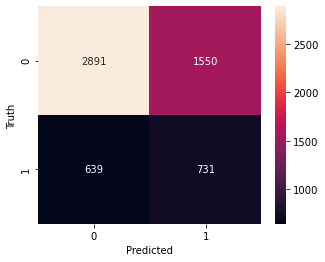

In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [262]:
from joblib import dump
dump(model, 'model_svm.joblib')

['model_svm.joblib']

In [264]:
label_df.set_index('bookingID', drop=True)

,label,90pct_speed,median_speed,mean_speed,max_speed,90pct_acceleration,median_acceleration,mean_acceleration,max_acceleration,75pct_gyro,median_gyro,25pct_gyro,mean_gyro,max_gyro
bookingID,,,,,,,,,,,,,,
0,0,19.506432,13.356852,11.429956,22.946083,10.642897,9.859265,9.893719,12.988328,0.038963,-0.001943,-0.049647,-0.005533,0.417845
1,1,18.593060,6.904588,7.881588,21.882141,10.462093,9.844748,9.862507,12.790147,0.023804,-0.003652,-0.034759,-0.007711,0.465599
2,1,7.276345,2.998761,3.157213,9.360483,10.346133,9.877755,9.929590,13.403410,0.023771,0.001292,-0.044196,-0.012706,0.433975
4,1,16.150000,3.310000,6.150996,19.780001,10.276516,9.791035,9.813434,21.053265,0.071775,0.024391,-0.017798,0.022562,0.654239
6,0,13.072651,1.914320,4.626175,16.394695,10.496764,9.903225,9.916871,14.498268,0.024797,0.004169,-0.019305,0.000347,0.538921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709396983948,1,10.256955,5.374465,5.728263,17.458735,10.783066,9.776426,9.846999,12.348440,0.119787,0.014531,-0.074369,0.025107,0.790848
1709396983960,1,20.124878,11.847303,10.907217,24.059151,10.679500,9.828038,9.943253,13.119410,0.039052,0.002651,-0.037270,-0.002112,0.357245
1709396983966,1,20.200000,15.455000,12.289439,25.540000,10.117538,9.696443,9.708279,13.135711,0.020690,0.002173,-0.011538,0.002222,0.499698
